In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


FILE = r"C:\Users\SULTANUS SALEHIN\Desktop\BHI\Dataset\mental_health_dataset.xlsx"

# Loading
df = pd.read_excel(FILE, sheet_name="Sheet1")
print(df.shape)
df.head()


(210, 10)


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7


### Uniqueness for each category

In [2]:
df.info()

# Converting columns to categorical
cat_cols = ["sex", "condition", "condition_type", "hospital_center_id"]
for c in cat_cols:
    df[c] = df[c].astype("category")

# Previewing unique values (to sanity check)
for c in cat_cols:
    print(f"\n{c} -> {df[c].nunique()} unique values")
    print(df[c].cat.categories.tolist()[:10])  # show up to first 10 categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB

sex -> 2 unique values
['female', 'male']

condition -> 4 unique values
['Acute coronar

### Missingness overview

In [3]:
# missing per column
miss_ct = df.isna().sum().sort_values(ascending=False)
miss_pct = (df.isna().mean() * 100).round(1).sort_values(ascending=False)

missing = pd.concat([miss_ct, miss_pct], axis=1)
missing.columns = ["missing_count", "missing_percent"]
missing


,missing_count,missing_percent
bdi_ii_follow_up_24w,44,21.0
bdi_ii_after_intervention_12w,43,20.5
bdi_ii_baseline,1,0.5
age,1,0.5
condition_type,1,0.5
sex,0,0.0
hospital_center_id,0,0.0
condition,0,0.0
mindfulness_therapies_started,0,0.0
mindfulness_therapies_completed,0,0.0


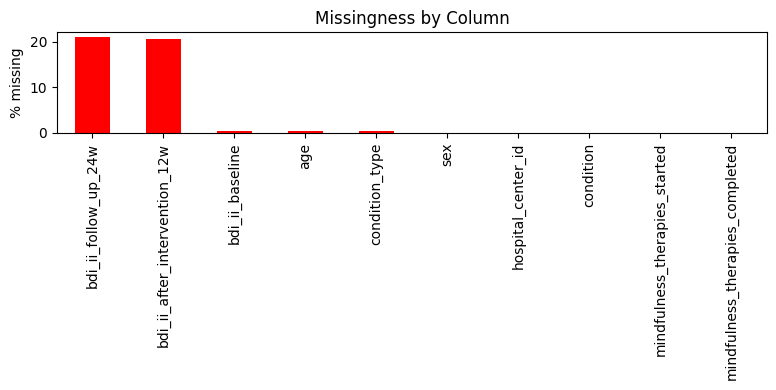

In [5]:
# Bar chart
plt.figure(figsize=(8,4))
missing["missing_percent"].plot(kind="bar", color="red")
plt.ylabel("% missing")
plt.title("Missingness by Column")
plt.tight_layout()
plt.show()


### Visualizing Descriptive Statistics

In [6]:
# 1) numeric summary
num_cols = [
    "age",
    "bdi_ii_baseline",
    "bdi_ii_after_intervention_12w",
    "bdi_ii_follow_up_24w",
    "mindfulness_therapies_started",
    "mindfulness_therapies_completed"
]

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,209.0,65.220096,11.179453,25.0,58.00,67.0,73.0,86.0
bdi_ii_baseline,209.0,11.167464,8.459502,0.0,5.00,10.0,15.0,43.0
bdi_ii_after_intervention_12w,167.0,7.479042,7.271697,0.0,2.00,6.0,11.0,40.0
bdi_ii_follow_up_24w,166.0,6.716867,7.335961,-1.0,2.00,5.0,9.0,41.0
mindfulness_therapies_started,210.0,25.109524,32.703575,0.0,2.00,9.5,35.5,180.0
mindfulness_therapies_completed,210.0,21.604762,30.242259,0.0,0.25,7.0,32.5,178.0


In [7]:
# 2) categorical summaries
for c in ["sex", "condition_type", "condition", "hospital_center_id"]:
    print(f"\n=== {c.upper()} ===")
    display(df[c].value_counts(dropna=False).head(10))



=== SEX ===


sex
male      119
female     91
Name: count, dtype: int64


=== CONDITION_TYPE ===


condition_type
Breast                                78
Prostate                              49
Revascularization                     43
Predialysis                           17
No prosthesis                         12
Percutaneous coronary intervention     9
Dialysis                               1
NaN                                    1
Name: count, dtype: int64


=== CONDITION ===


condition
Cancer                     127
Acute coronary syndrome     52
Renal insufficiency         19
Lower-limb amputation       12
Name: count, dtype: int64


=== HOSPITAL_CENTER_ID ===


hospital_center_id
1    142
3     53
2     15
Name: count, dtype: int64

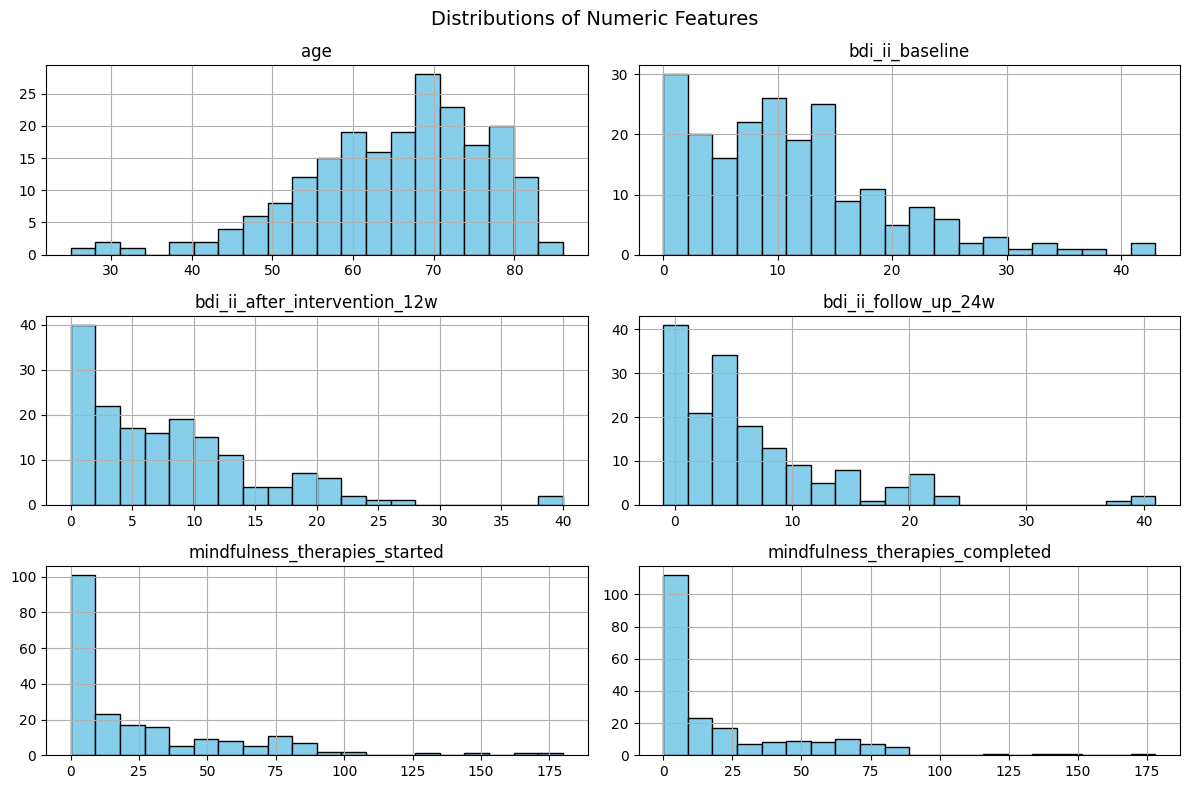

C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_31732\1993995901.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="Set2")


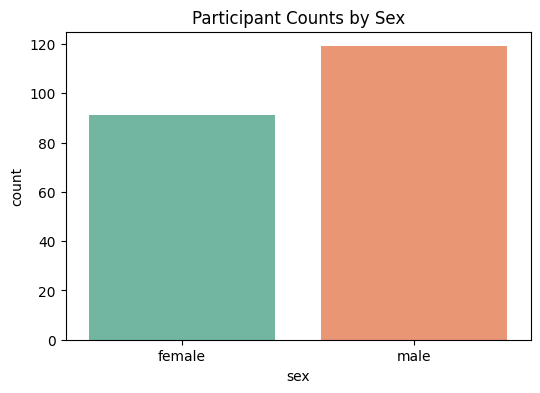

C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_31732\1993995901.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="condition_type", data=df, order=df["condition_type"].value_counts().index, palette="Set3")


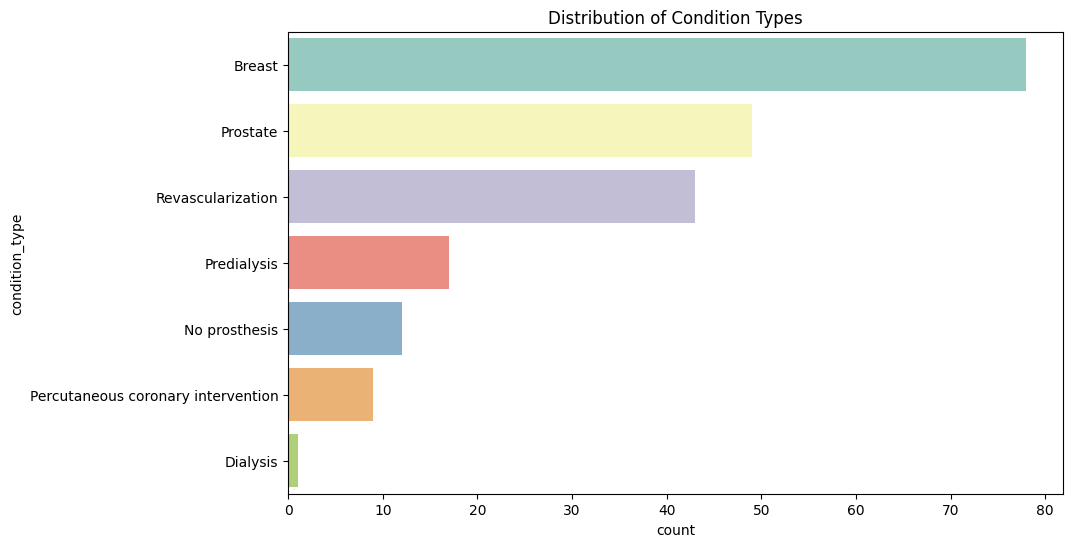

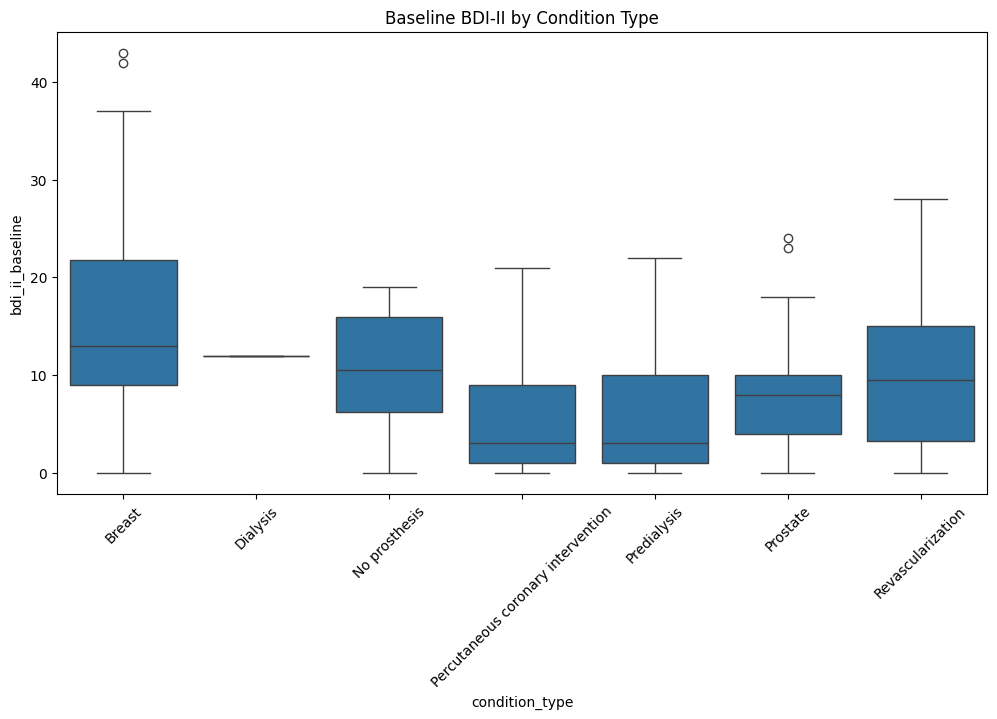

In [8]:
import seaborn as sns

# 1) distributions of numeric columns
num_cols = [
    "age",
    "bdi_ii_baseline",
    "bdi_ii_after_intervention_12w",
    "bdi_ii_follow_up_24w",
    "mindfulness_therapies_started",
    "mindfulness_therapies_completed"
]

df[num_cols].hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distributions of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# 2) count of participants by sex
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=df, palette="Set2")
plt.title("Participant Counts by Sex")
plt.show()

# 3) distribution of condition types
plt.figure(figsize=(10,6))
sns.countplot(y="condition_type", data=df, order=df["condition_type"].value_counts().index, palette="Set3")
plt.title("Distribution of Condition Types")
plt.show()

# 4) baseline depression score by condition type
plt.figure(figsize=(12,6))
sns.boxplot(x="condition_type", y="bdi_ii_baseline", data=df)
plt.xticks(rotation=45)
plt.title("Baseline BDI-II by Condition Type")
plt.show()


In [10]:
import numpy as np

# ============================================================
# Step 5: Create Analysis Features
# ============================================================

# 1) Absolute improvements in depression score
# Formula: baseline - followup
# Positive values = symptom reduction (improvement)
# Negative values = worsening
df["delta_12w"] = df["bdi_ii_baseline"] - df["bdi_ii_after_intervention_12w"]
df["delta_24w"] = df["bdi_ii_baseline"] - df["bdi_ii_follow_up_24w"]

# 2) Percentage improvements (relative to baseline)
# Example: baseline=20, followup=10 → delta=10 → 50% improvement
# np.where is used to avoid divide-by-zero errors
df["pct_improve_12w"] = np.where(df["bdi_ii_baseline"]>0,
                                 100*df["delta_12w"]/df["bdi_ii_baseline"], np.nan)
df["pct_improve_24w"] = np.where(df["bdi_ii_baseline"]>0,
                                 100*df["delta_24w"]/df["bdi_ii_baseline"], np.nan)

# 3) Therapy completion rate
# Formula: completed / started
# Example: started 12, completed 9 → 75% completion
df["completion_rate"] = np.where(df["mindfulness_therapies_started"]>0,
                                 df["mindfulness_therapies_completed"]/df["mindfulness_therapies_started"], np.nan)

# 4) Flags for whether follow-up data is available
# True if non-missing, False otherwise
df["has_12w"] = df["bdi_ii_after_intervention_12w"].notna()
df["has_24w"] = df["bdi_ii_follow_up_24w"].notna()

# 5) Preview new columns
df[["delta_12w","delta_24w","pct_improve_12w","pct_improve_24w","completion_rate","has_12w","has_24w"]].head()


,delta_12w,delta_24w,pct_improve_12w,pct_improve_24w,completion_rate,has_12w,has_24w
0,7.0,3.0,70.000000,30.000000,0.928571,True,True
1,0.0,-4.0,0.000000,-100.000000,0.857143,True,True
2,8.0,5.0,44.444444,27.777778,1.000000,True,True
3,NaN,NaN,NaN,NaN,NaN,False,False
4,-6.0,-15.0,-120.000000,-300.000000,0.583333,True,True


### Visualize improvements & engagement

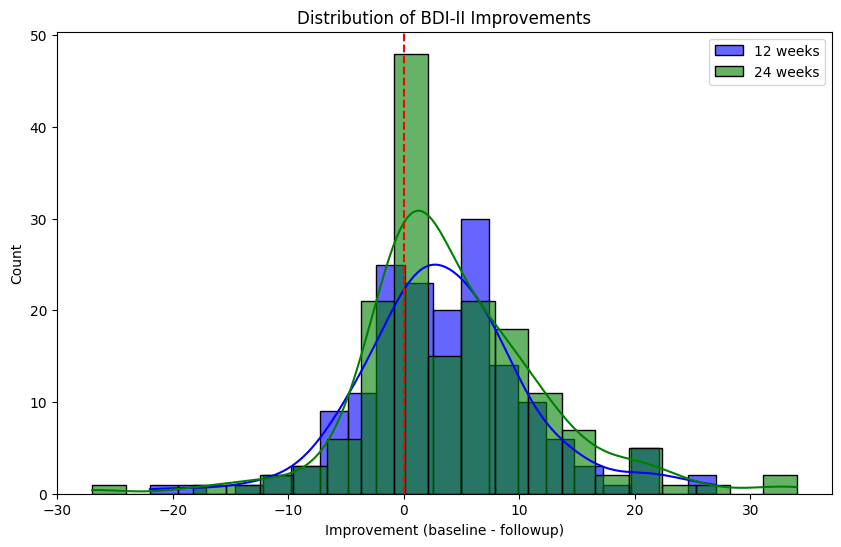

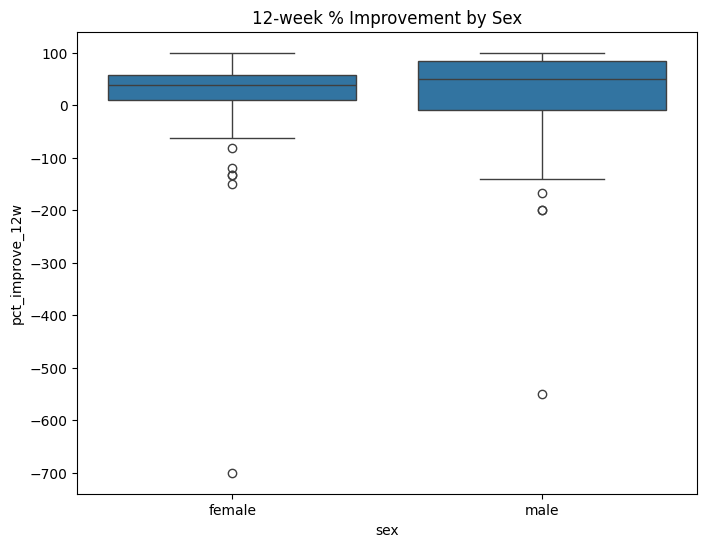

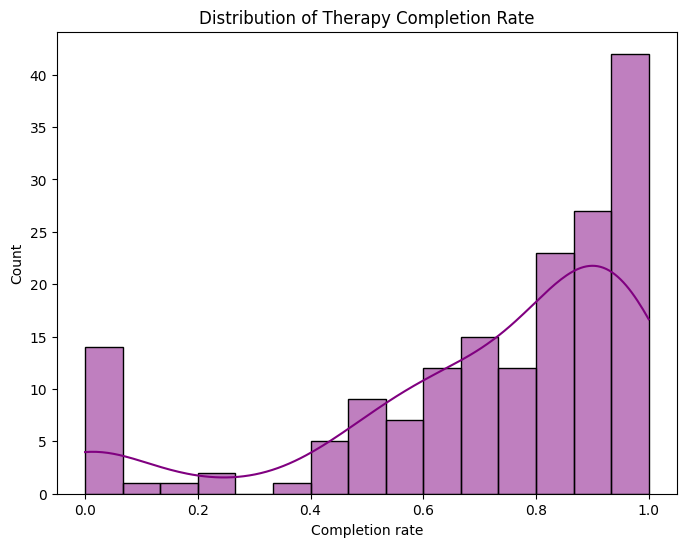

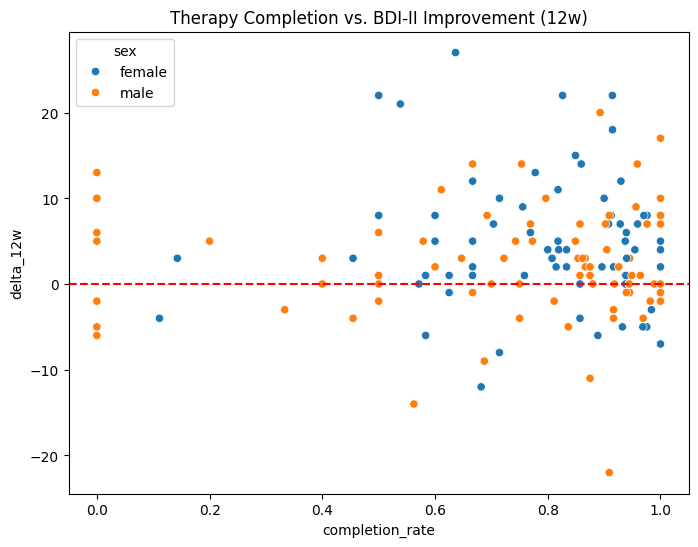

In [11]:
import seaborn as sns

# 1) distribution of BDI-II improvements (12w vs 24w)
plt.figure(figsize=(10,6))
sns.histplot(df["delta_12w"].dropna(), kde=True, color="blue", label="12 weeks", alpha=0.6)
sns.histplot(df["delta_24w"].dropna(), kde=True, color="green", label="24 weeks", alpha=0.6)
plt.axvline(0, color="red", linestyle="--")
plt.legend()
plt.title("Distribution of BDI-II Improvements")
plt.xlabel("Improvement (baseline - followup)")
plt.show()

# 2) percent improvement comparison by sex
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="pct_improve_12w", data=df)
plt.title("12-week % Improvement by Sex")
plt.show()

# 3) therapy completion rate distribution
plt.figure(figsize=(8,6))
sns.histplot(df["completion_rate"].dropna(), bins=15, kde=True, color="purple")
plt.title("Distribution of Therapy Completion Rate")
plt.xlabel("Completion rate")
plt.show()

# 4) relationship between completion rate & improvement
plt.figure(figsize=(8,6))
sns.scatterplot(x="completion_rate", y="delta_12w", hue="sex", data=df)
plt.axhline(0, color="red", linestyle="--")
plt.title("Therapy Completion vs. BDI-II Improvement (12w)")
plt.show()


### Group Comparison

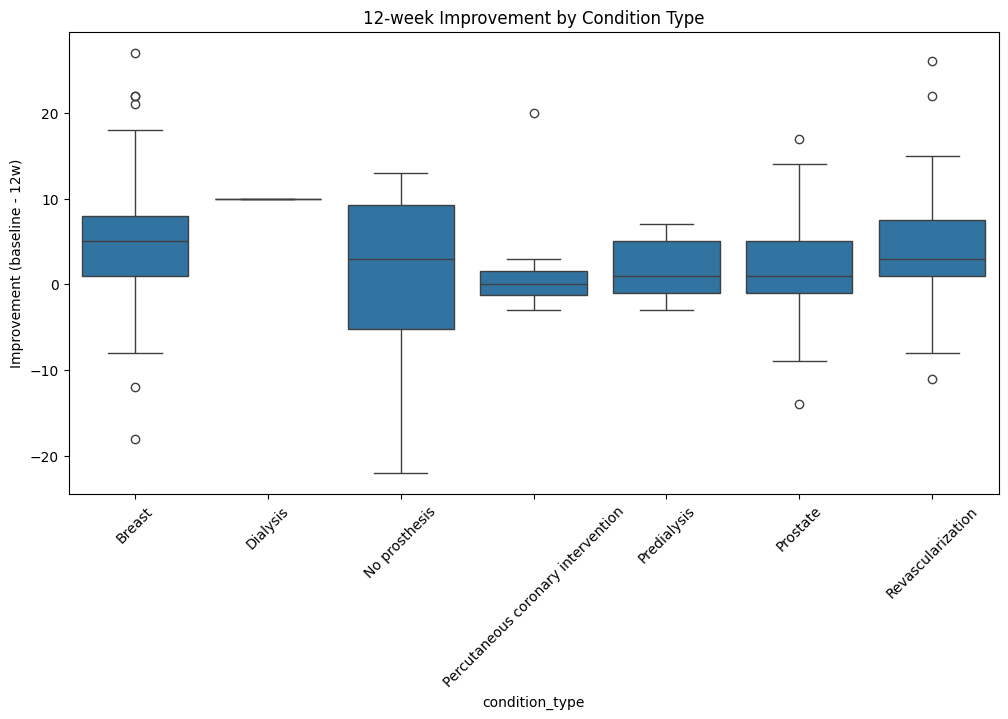

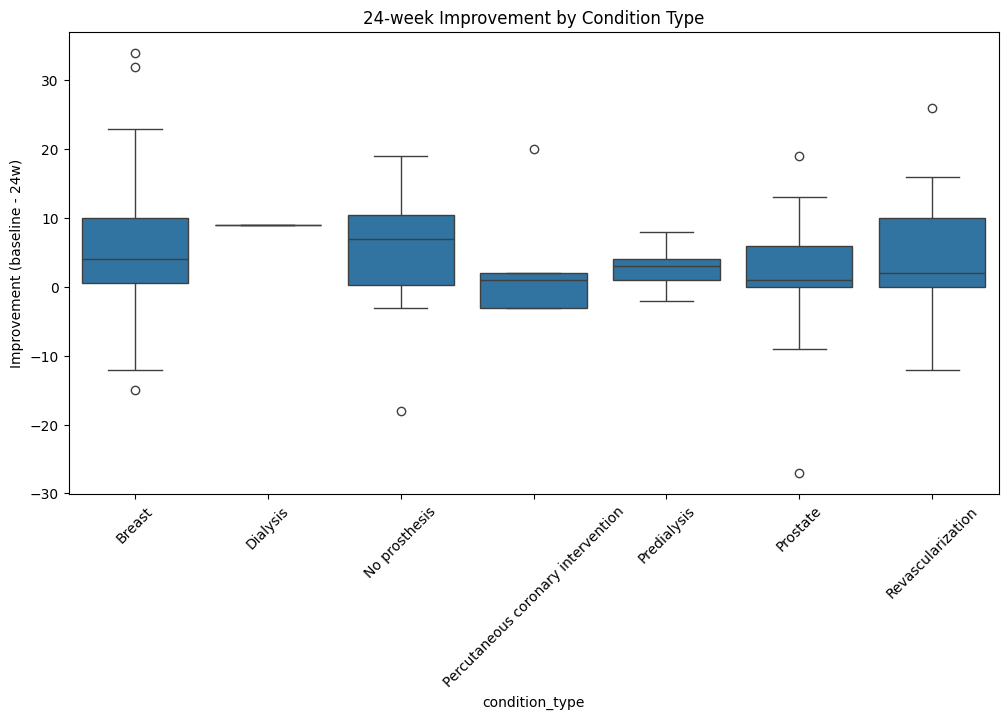

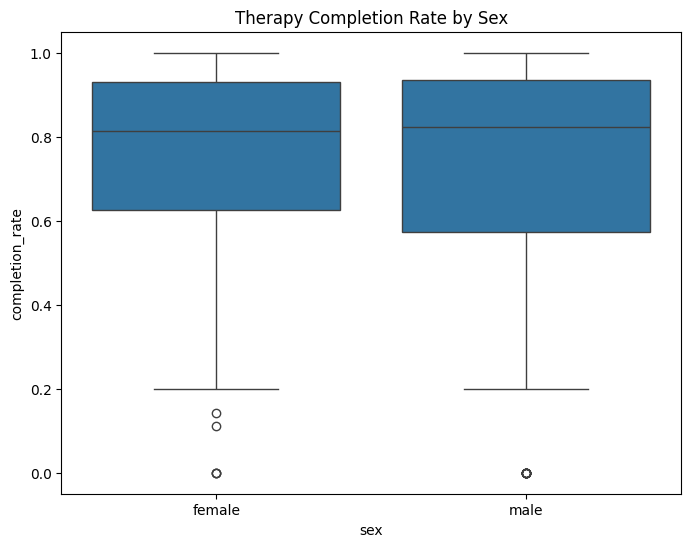

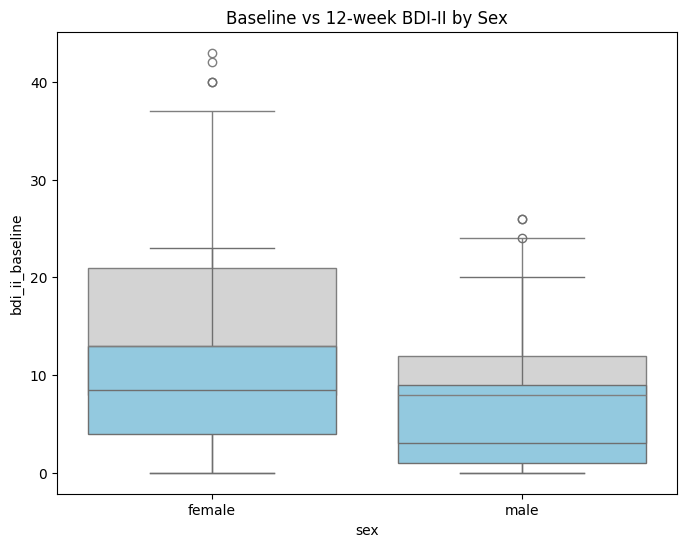

In [12]:
# 1) Improvement by condition type (12 weeks)
plt.figure(figsize=(12,6))
sns.boxplot(x="condition_type", y="delta_12w", data=df)
plt.xticks(rotation=45)
plt.title("12-week Improvement by Condition Type")
plt.ylabel("Improvement (baseline - 12w)")
plt.show()

# 2) Improvement by condition type (24 weeks)
plt.figure(figsize=(12,6))
sns.boxplot(x="condition_type", y="delta_24w", data=df)
plt.xticks(rotation=45)
plt.title("24-week Improvement by Condition Type")
plt.ylabel("Improvement (baseline - 24w)")
plt.show()

# 3) Compare completion rates by sex
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="completion_rate", data=df)
plt.title("Therapy Completion Rate by Sex")
plt.show()

# 4) Compare baseline vs 12-week outcomes by sex (paired view)
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="bdi_ii_baseline", data=df, color="lightgray")
sns.boxplot(x="sex", y="bdi_ii_after_intervention_12w", data=df, color="skyblue")
plt.title("Baseline vs 12-week BDI-II by Sex")
plt.show()


### Correlation & factor importance

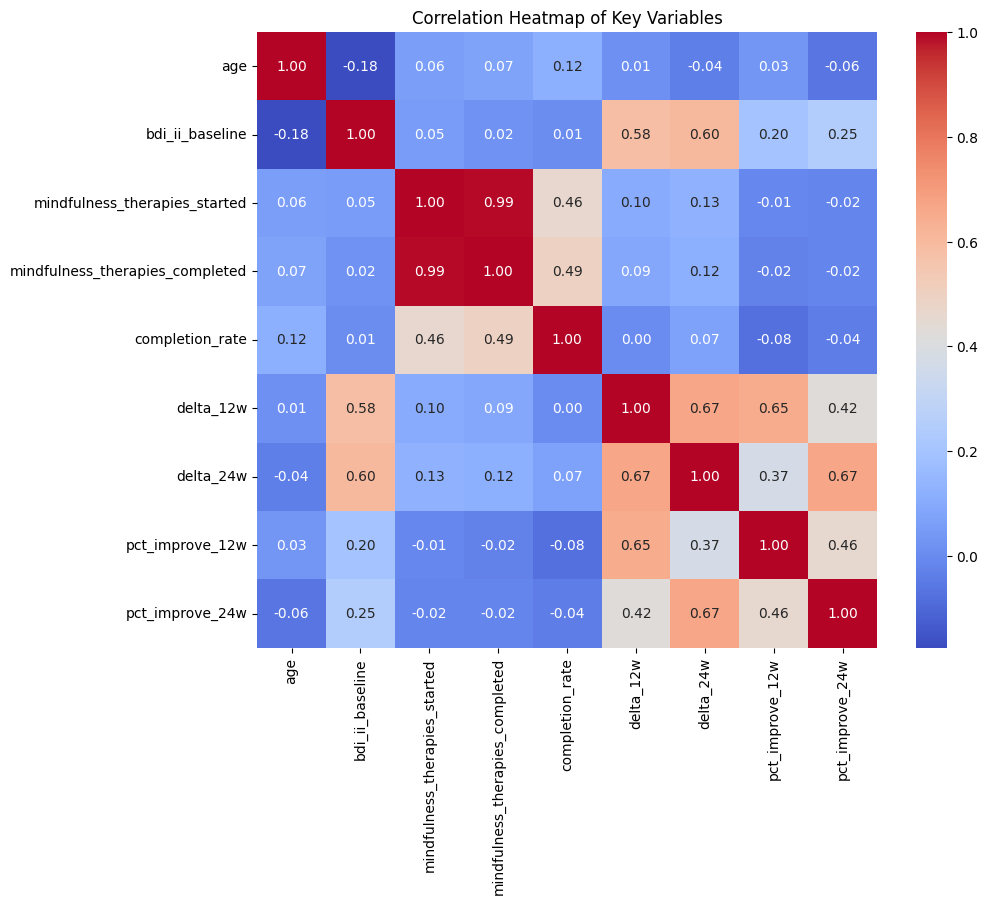

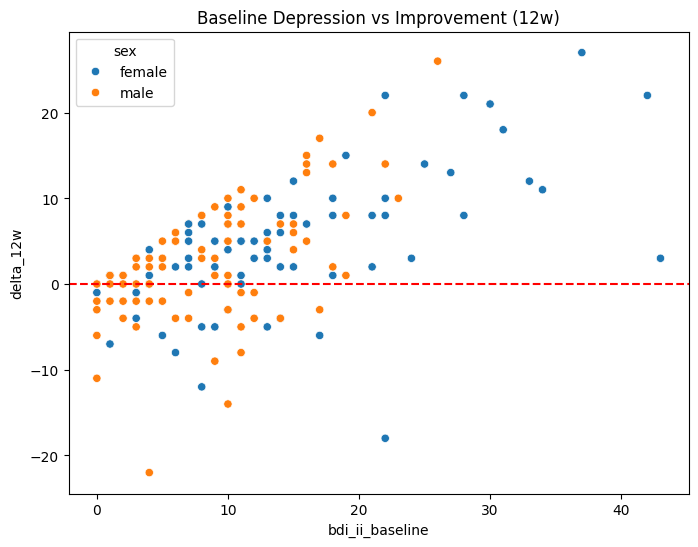

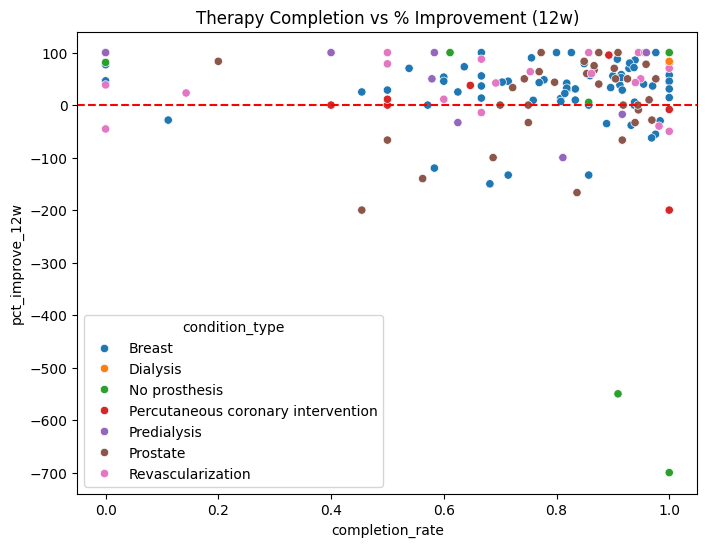

In [13]:
# 1) numeric correlation matrix
num_cols = [
    "age",
    "bdi_ii_baseline",
    "mindfulness_therapies_started",
    "mindfulness_therapies_completed",
    "completion_rate",
    "delta_12w",
    "delta_24w",
    "pct_improve_12w",
    "pct_improve_24w"
]

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

# 2) scatter: baseline vs improvement
plt.figure(figsize=(8,6))
sns.scatterplot(x="bdi_ii_baseline", y="delta_12w", hue="sex", data=df)
plt.axhline(0, color="red", linestyle="--")
plt.title("Baseline Depression vs Improvement (12w)")
plt.show()

# 3) scatter: completion rate vs % improvement
plt.figure(figsize=(8,6))
sns.scatterplot(x="completion_rate", y="pct_improve_12w", hue="condition_type", data=df)
plt.axhline(0, color="red", linestyle="--")
plt.title("Therapy Completion vs % Improvement (12w)")
plt.show()
